# แบบฝึกหัด Pandas : ซื้อหุ้นเดือนไหนดี
- ทดสอบ 10 ปีย้อนหลัง กับหุ้น Advanc พบว่า ซื้อในเดือนกุมภาพันธ์ 10 ครั้งชนะ 10 ครั้ง
- ใช้ข้อมูลย้อนหลัง 2013-2022 ระยะเวลา 10 ปี (120 เดือน)

# การทดลอง

In [ ]:
#!pip install starfishX --upgrade

In [8]:
import starfishX as sx
from starfishX.utilHelpers import monthlyReturn,HistStockPrice

import mplcyberpunk
import matplotlib.pyplot as plt 

%matplotlib inline
%config InlineBackend.figure_format='retina'
plt.style.use("cyberpunk")

In [9]:
print(sx.__version__)

0.155547


In [10]:
obj = HistStockPrice() 

# ตัวอย่างทดสอบกับหุ้น ADVANC

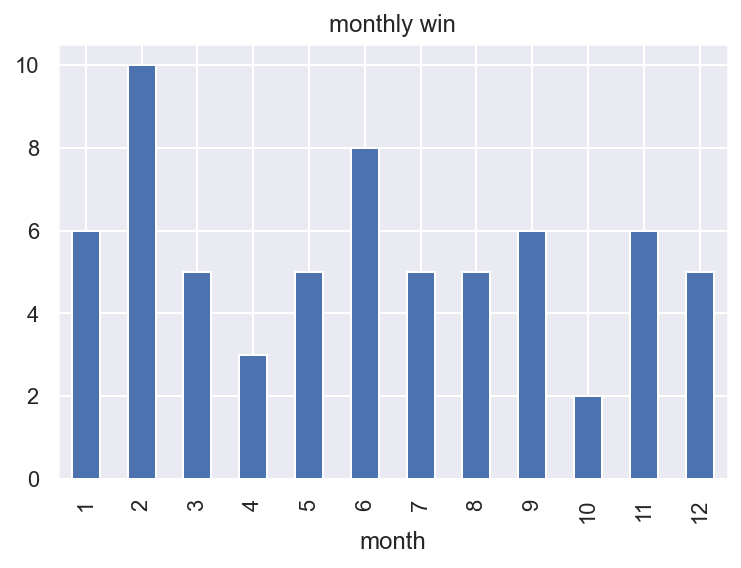

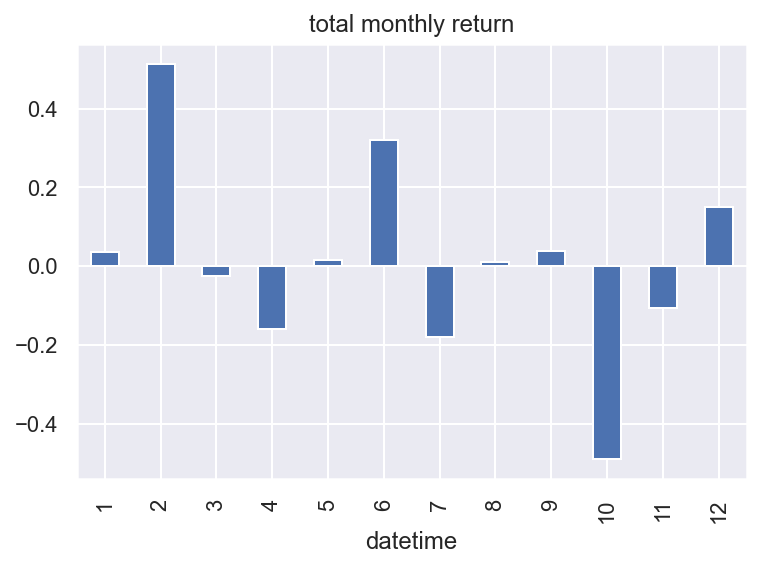

symbol   open   high    low  close       volume  month  year  \
Date                                                                           
2013-01-01  set:ADVANC  209.0  215.0  194.0  210.0  128346400.0      1  2013   
2013-02-01  set:ADVANC  210.0  210.0  197.5  207.0  122863600.0      2  2013   
2013-03-01  set:ADVANC  208.0  250.0  205.0  240.0  154367300.0      3  2013   
2013-04-01  set:ADVANC  235.0  273.0  221.0  270.0  118357500.0      4  2013   
2013-05-02  set:ADVANC  275.0  305.0  263.0  263.0  145472400.0      5  2013   
...                ...    ...    ...    ...    ...          ...    ...   ...   
2022-06-01  set:ADVANC  218.0  221.0  194.5  194.5  146267854.0      6  2022   
2022-07-01  set:ADVANC  195.0  207.0  194.5  201.0  102582042.0      7  2022   
2022-08-01  set:ADVANC  201.0  205.0  189.5  192.0  126797114.0      8  2022   
2022-09-01  set:ADVANC  192.0  201.0  189.0  195.0  167147724.0      9  2022   
2022-10-03  set:ADVANC  194.5  195.0  181.5  191.0  134827189.0     10  2022   

            pct_change_  pct_change_m  month_win  
Date                                              
2013-01-01     0.004785     -0.014286          0  
2013-02-01    -0.014286      0.159420          1  
2013-03-01     0.159420      0.125000          1  
2013-04-01     0.125000     -0.025926          0  
2013-05-02    -0.025926      0.072243          1  
...                 ...           ...        ...  
2022-06-01    -0.103687      0.033419          1  
2022-07-01     0.033419     -0.044776          0  
2022-08-01    -0.044776      0.015625          1  
2022-09-01     0.015625     -0.020513          0  
2022-10-03    -0.020513     -0.018325          0  

[118 rows x 11 columns]

In [36]:
df = monthlyReturn(symbol='ADVANC',month=120,engine=obj)
df

In [37]:
df.groupby(df.index.month)['month_win'].sum() , df.groupby(df.index.month)['month_win'].sum().sum(),len(df)

(Date
 1      6
 2     10
 3      5
 4      3
 5      5
 6      8
 7      5
 8      5
 9      6
 10     2
 11     6
 12     5
 Name: month_win, dtype: int64,
 66,
 118)

In [38]:
df.groupby(df.index.month).size()

Date
1     10
2     10
3     10
4     10
5     10
6     10
7     10
8     10
9     10
10    10
11     9
12     9
dtype: int64

In [43]:
#ผลตอบแทนในเดือนกุมภาพันธ์ ของ Advanc 10 ปีย้อนหลัง
df[df['month']==2][['pct_change_m']]*100

pct_change_m
Date                    
2013-02-01     15.942029
2014-02-03      7.109005
2015-02-02      1.716738
2016-02-01      6.744868
2017-02-01      6.586826
2018-02-01      5.050505
2019-02-01      1.098901
2020-02-03      0.500000
2021-02-01      4.833837
2022-02-01      1.746725

In [47]:
df[df['month']==2][['pct_change_m']].mean()*100

pct_change_m    5.132943
dtype: float64

# ตรวจคำตอบ
- ดูราคาปิด เดือนกุมภาพันธ์ต้นเดือนเทียบราคาปิดเดือนมีนาคมต้นเดือน

In [50]:
import pandas as pd
pd.set_option('display.max_rows', None)

df[(df.month==2) | (df.month==3)]

symbol   open   high    low  close       volume  month  year  \
Date                                                                           
2013-02-01  set:ADVANC  210.0  210.0  197.5  207.0  122863600.0      2  2013   
2013-03-01  set:ADVANC  208.0  250.0  205.0  240.0  154367300.0      3  2013   
2014-02-03  set:ADVANC  210.0  224.0  201.0  211.0  127736900.0      2  2014   
2014-03-03  set:ADVANC  211.0  231.0  208.0  226.0  133989100.0      3  2014   
2015-02-02  set:ADVANC  244.0  253.0  226.0  233.0  111510100.0      2  2015   
2015-03-02  set:ADVANC  233.0  253.0  229.0  237.0  129364400.0      3  2015   
2016-02-01  set:ADVANC  167.5  175.0  163.0  170.5  258990700.0      2  2016   
2016-03-01  set:ADVANC  170.5  190.0  164.5  182.0  388009500.0      3  2016   
2017-02-01  set:ADVANC  158.0  174.0  157.0  167.0  189043900.0      2  2017   
2017-03-01  set:ADVANC  167.5  181.0  167.0  178.0  152089900.0      3  2017   
2018-02-01  set:ADVANC  193.5  200.0  190.5  198.0  103335900.0      2  2018   
2018-03-02  set:ADVANC  197.5  215.0  194.0  208.0  150095300.0      3  2018   
2019-02-01  set:ADVANC  179.5  188.0  177.0  182.0  135093700.0      2  2019   
2019-03-01  set:ADVANC  183.0  186.0  178.5  184.0   82297200.0      3  2019   
2020-02-03  set:ADVANC  205.0  215.0  195.5  200.0  175482500.0      2  2020   
2020-03-02  set:ADVANC  202.0  208.0  156.5  201.0  293544000.0      3  2020   
2021-02-01  set:ADVANC  172.0  176.0  164.0  165.5  113133700.0      2  2021   
2021-03-01  set:ADVANC  164.5  175.5  164.0  173.5  151757800.0      3  2021   
2022-02-01  set:ADVANC  221.0  242.0  218.0  229.0  126692200.0      2  2022   
2022-03-01  set:ADVANC  232.0  242.0  221.0  233.0  131220700.0      3  2022   

            pct_change_  pct_change_m  month_win  
Date                                              
2013-02-01    -0.014286      0.159420          1  
2013-03-01     0.159420      0.125000          1  
2014-02-03     0.009569      0.071090          1  
2014-03-03     0.071090      0.070796          1  
2015-02-02    -0.048980      0.017167          1  
2015-03-02     0.017167      0.012658          1  
2016-02-01     0.008876      0.067449          1  
2016-03-01     0.067449     -0.142857          0  
2017-02-01     0.050314      0.065868          1  
2017-03-01     0.065868     -0.016854          0  
2018-02-01     0.028571      0.050505          1  
2018-03-02     0.050505      0.000000          1  
2019-02-01     0.019608      0.010989          1  
2019-03-01     0.010989      0.032609          1  
2020-02-03    -0.019608      0.005000          1  
2020-03-02     0.005000     -0.014925          0  
2021-02-01    -0.037791      0.048338          1  
2021-03-01     0.048338     -0.014409          0  
2022-02-01     0.040909      0.017467          1  
2022-03-01     0.017467     -0.077253          0